In [1]:
from matplotlib.image import imread
import numpy as np
import matplotlib.pyplot as plt
import scipy

In [2]:
def dct2(a):
    return scipy.fftpack.dct( scipy.fftpack.dct( a, axis=0, norm='ortho' ), axis=1, norm='ortho' )

def idct2(a):
    return scipy.fftpack.idct( scipy.fftpack.idct( a, axis=0 , norm='ortho'), axis=1 , norm='ortho')

In [3]:
A = imread('dog.jpg')
B = np.mean(A, -1); # Convert RGB to grayscale
B = np.expand_dims(B, -1)

In [4]:
B.shape

(2000, 1500, 1)

In [5]:
input_frame = B

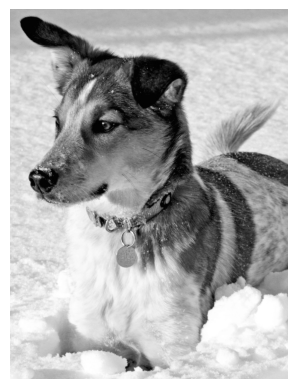

In [6]:
plt.figure()
plt.imshow(input_frame,cmap='gray')
plt.axis('off');

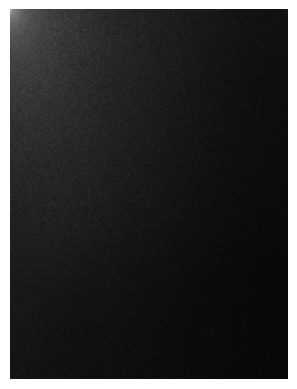

In [7]:
# View DCT of image using dct2
plt.figure()
image_dct = dct2(input_frame)
log_image_dct = np.log(np.abs(image_dct)+1) # Put DCT on log scale
plt.imshow(log_image_dct,cmap='gray')
plt.axis('off');

In [8]:
def thresholding(input, thresholding_fraction):
    """
        Keep the top {thresholding_fraction}% of input and
        zero out all other values
    """
    
    Bt = np.sort(np.abs(np.reshape(input,-1)))
    thresh_value = Bt[int(np.floor((1-thresholding_fraction)*len(Bt)))]
    idxes = np.abs(input) > thresh_value
    thresholded_output = input * idxes

    return thresholded_output


In [9]:
def compress_frame(input_frame, compress_ratio=0.1):

    try:
        0.0 < compress_ratio < 1.0
    except ValueError:
        print(f"Only valid for 0.0 < compress_ratio < 1.0. Given compress_ratio is {compress_ratio}")
    
    keep = 1 - compress_ratio
    # Compute DCT of image using dct2
    dct_input = dct2(input_frame)
    
    thresholded_coefficients = thresholding(dct_input, keep)
    
    # Inverse DCT and return compressed frame
    compressed_frame = idct2(thresholded_coefficients)
    return compressed_frame

In [10]:
# def compress_image(input_frame, keep=0.8):
#     # Compute DCT of image using dct2
#     dct_input = dct2(input_frame)

#     # Keep the top {keep}% of coefficients and
#     # zero out all other small coefficients
#     Bt = np.sort(np.abs(np.reshape(dct_input,-1)))
#     thresh_value = Bt[int(np.floor((1-keep)*len(Bt)))]
#     idxes = np.abs(dct_input) > thresh_value
#     dct_input_compressed = dct_input * idxes

#     # Inverse DCT and return compressed frame
#     compressed_frame = idct2(dct_input_compressed)
#     return compressed_frame
    

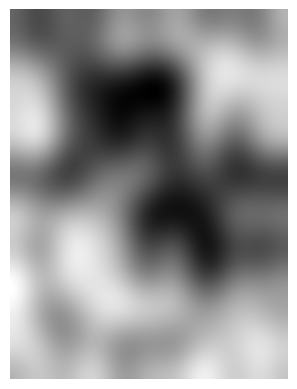

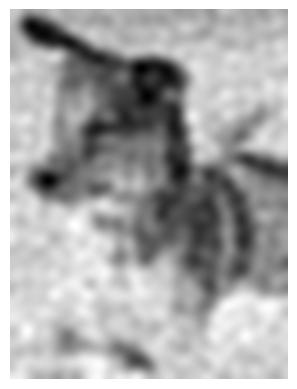

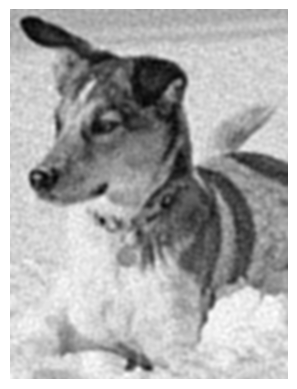

In [14]:
for i,keep in enumerate([1E-5, 1E-4, 1E-3]):
    compress_ratio = 1-keep
    plt.figure(i)
    plt.imshow(compress_frame(input_frame, compress_ratio),cmap='gray')
    plt.axis('off');